In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
# mengecek versi tensorflow
print(tf.__version__)

2.2.0


In [28]:
# import dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-06-07 09:22:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  20.4MB/s    in 3.3s    

2020-06-07 09:22:59 (20.4 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [0]:
# melakkan ekstrasi pada file zip
import zipfile, os

local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'

# membuat direktori train dan validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [31]:
# mengecek file apa saja yang ada di direktori train
os.listdir('/tmp/images/train')

['messy', 'clean']

In [32]:
# mengecek file apa saja yang ada di direktori validation
os.listdir('/tmp/images/val')

['messy', 'clean']

In [0]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validatiaon
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validation
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [0]:
# proses augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [35]:
# mempersiapkan data latih
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size = (150, 150), #mengubah resolusi seluruh gambar
    batch_size = 4,
    # karena merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode='binary'
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size = (150, 150), #mengubah resolusi seluruh gambar
    batch_size = 4,
    # karena merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode='binary'
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
# membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
# mencompile dan menentukan loss function serta optimizer
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [38]:
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20,
    validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, #berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/20
25/25 - 6s - loss: 0.7164 - accuracy: 0.4800 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6974 - accuracy: 0.4900 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6659 - accuracy: 0.5500 - val_loss: 0.6816 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.6944 - accuracy: 0.4600 - val_loss: 0.6800 - val_accuracy: 0.7000
Epoch 5/20
25/25 - 6s - loss: 0.6575 - accuracy: 0.6500 - val_loss: 0.6612 - val_accuracy: 0.7500
Epoch 6/20
25/25 - 6s - loss: 0.6182 - accuracy: 0.6200 - val_loss: 0.6004 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 6s - loss: 0.7447 - accuracy: 0.5400 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.6990 - accuracy: 0.5700 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 6s - loss: 0.6921 - accuracy: 0.5100 - val_loss: 0.6716 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6971 - accuracy: 0.5200 - val_loss: 0.6900 - val_accuracy: 0.6000
Epoch 11/20
25/25 -

Saving 3.png to 3.png
[[0.9999995]]
3.png
messy


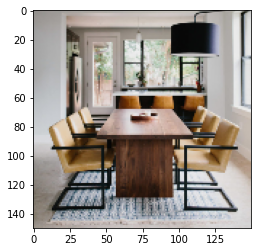

In [44]:
# prediksi

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  
  print(classes)
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')